In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [ ]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
'''
data = pd.read_csv('/content/drive/MyDrive/TSA/AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)
'''

"\ndata = pd.read_csv('/content/drive/MyDrive/TSA/AirPassengers.csv')\nprint (data.head())\nprint ('\n Data Types:')\nprint (data.dtypes)\n"

In [ ]:
# The data contains a particular month and number of passengers travelling in that month.
#In order to read the data as a time series, we have to pass special arguments to the
#read_csv command:

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/content/drive/MyDrive/TSA/AirPassengers.csv', parse_dates=['Month'],
                   index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())



 Parsed Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


<ipython-input-25-2a7252c37b8c>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('/content/drive/MyDrive/TSA/AirPassengers.csv', parse_dates=['Month'],


In [ ]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
#Convert to timeseries
ts = data['#Passengers']
ts.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
#Indexing time series arrays
ts['1949-04-01']

129

In [ ]:
#Import datetime library and use 'datetime' function
from datetime import datetime
ts[datetime(1949,1,1)]

112

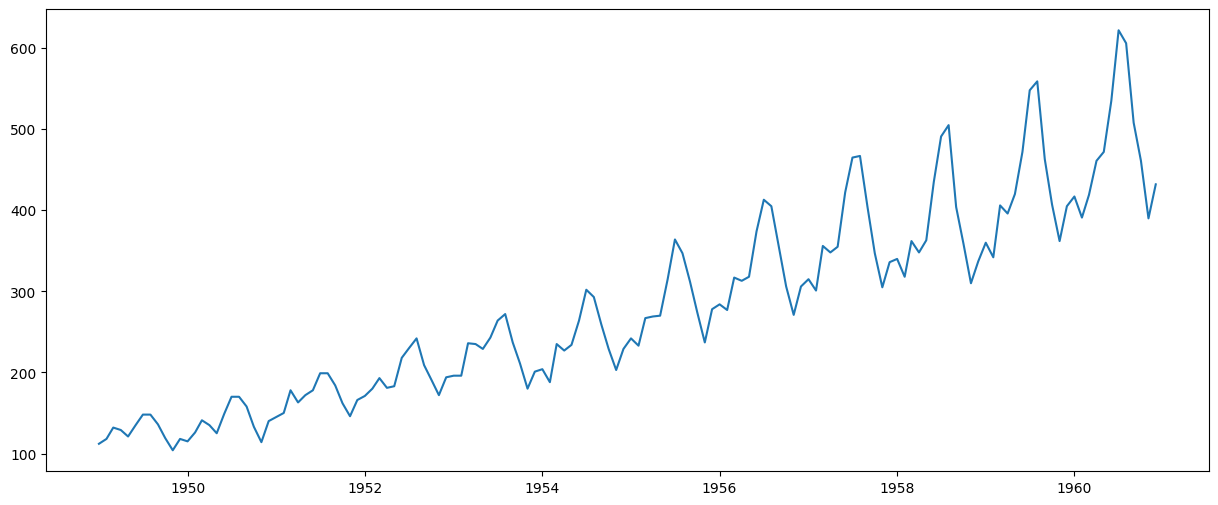

In [ ]:
#CHECK STATIONARITY
plt.plot(ts)

# Stationarity Test

In [ ]:
#STATIONARITY CHECK
#Ho: TS is non-Stationary
#H1: TS is stationary
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


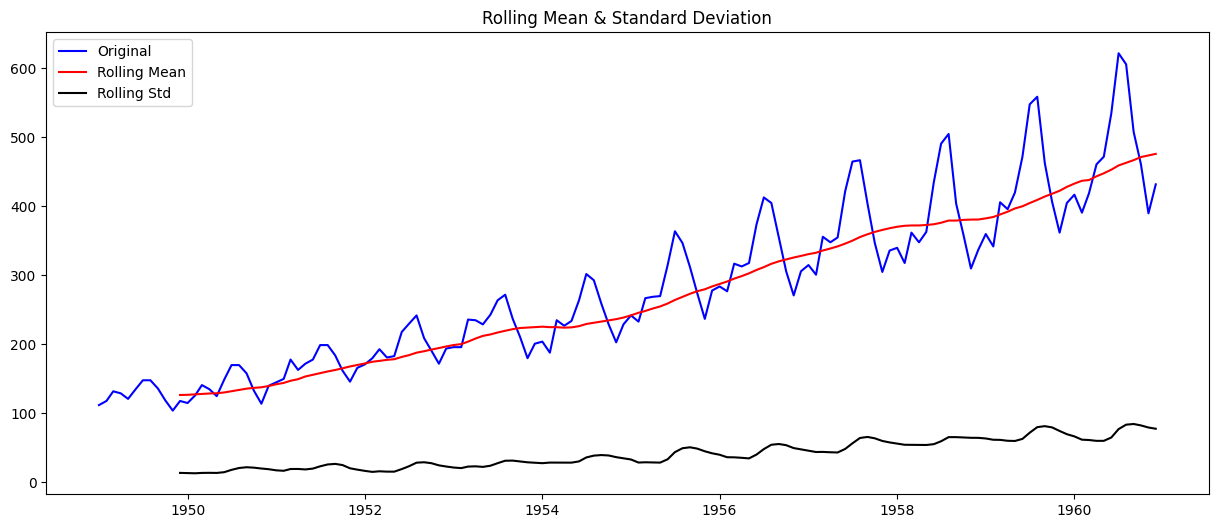

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(ts)

# MAKING TS STATIONARY

- Log Transformation
- Differencing
- Double Log
- Double Differencing
- Log + Differencing


After your forecasting is done, always do the inverse transformation

In [ ]:
ts.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
ts_log = np.log(ts)

In [ ]:
ts_log.head(5)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [ ]:
ts.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
ts_log.head(5)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


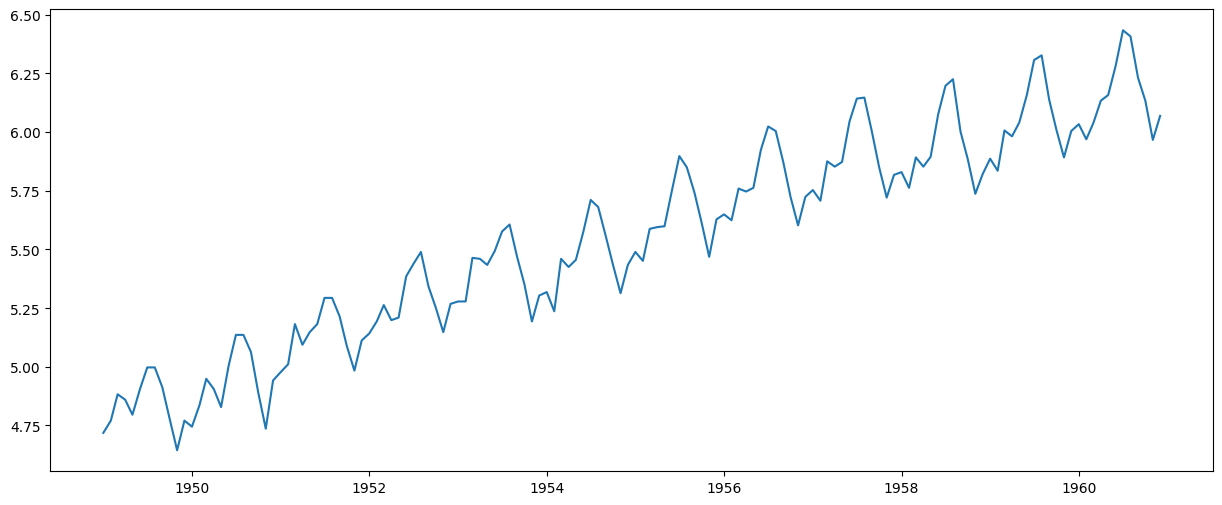

In [ ]:
plt.plot(ts_log)


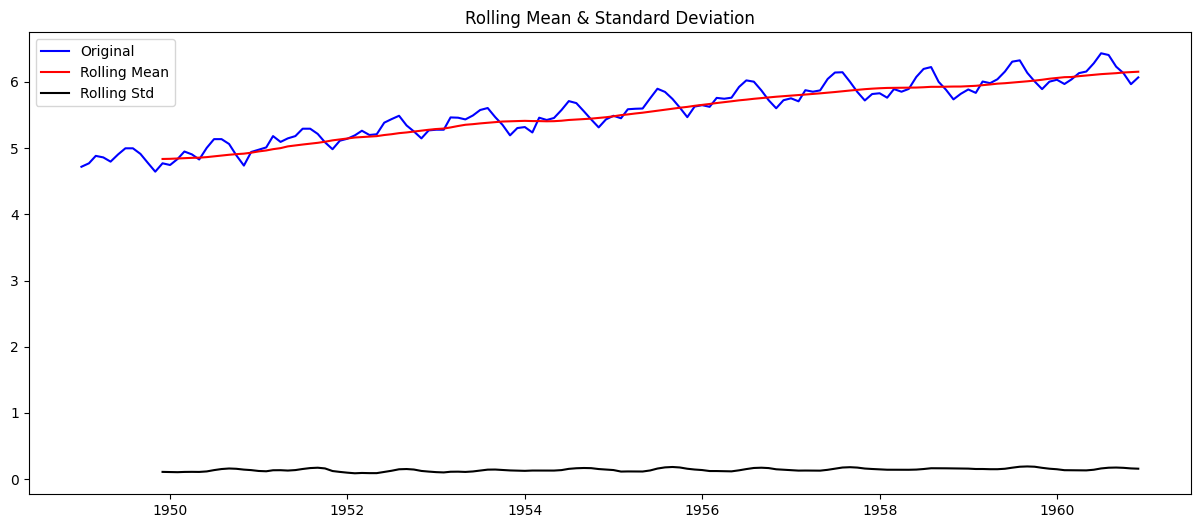

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(ts_log)

In [ ]:
ts_doublelog = np.log(ts_log)

In [ ]:
ts_doublelog.head(5)

,#Passengers
Month,
1949-01-01,1.551491
1949-02-01,1.562490
1949-03-01,1.585719
1949-04-01,1.581000
1949-05-01,1.567739


In [ ]:
ts_doublelog.tail(5)

,#Passengers
Month,
1960-08-01,1.857372
1960-09-01,1.829454
1960-10-01,1.813749
1960-11-01,1.786101
1960-12-01,1.803099


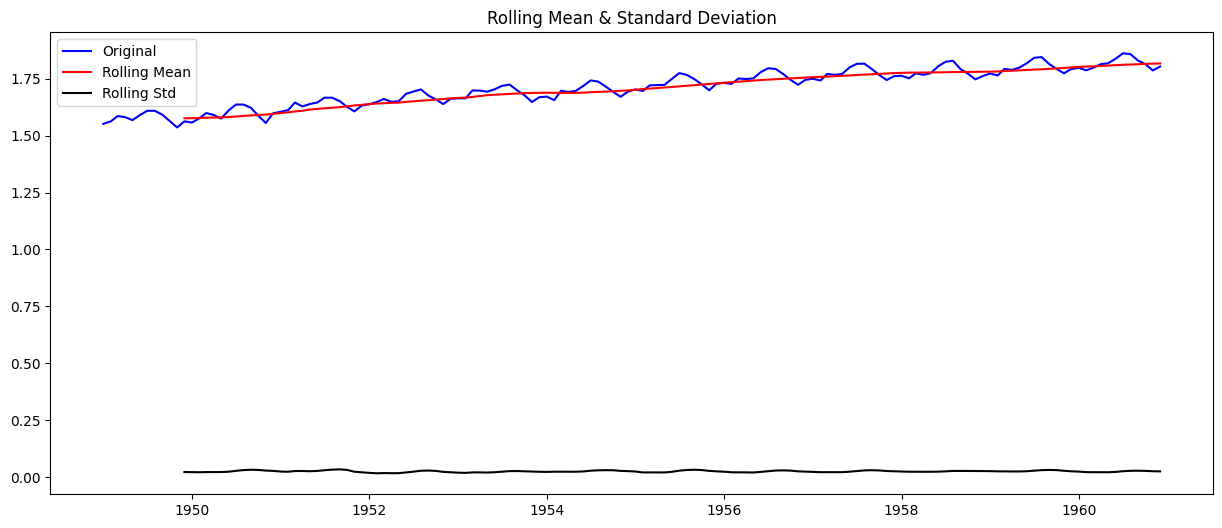

Results of Dickey-Fuller Test:
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(ts_doublelog)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


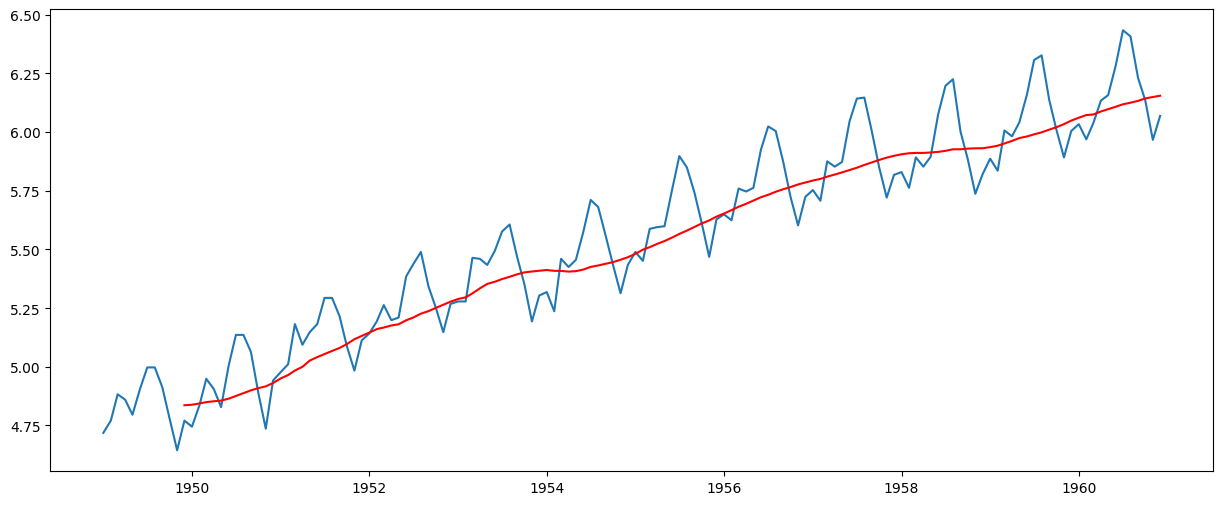

In [ ]:
#Smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

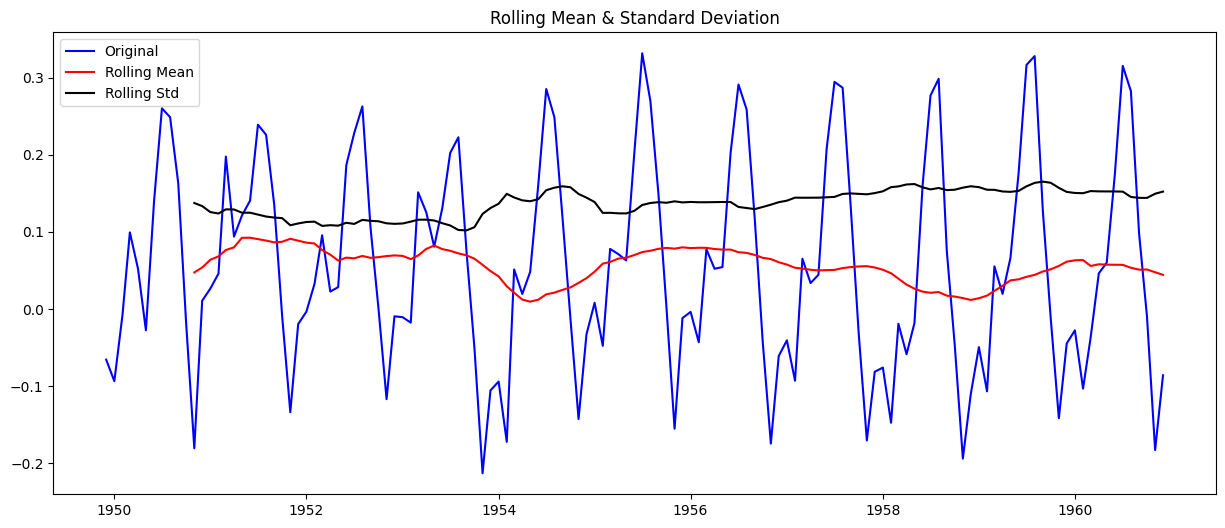

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
#TEST STATIONARITY AGAIN
test_stationarity(ts_log_moving_avg_diff)

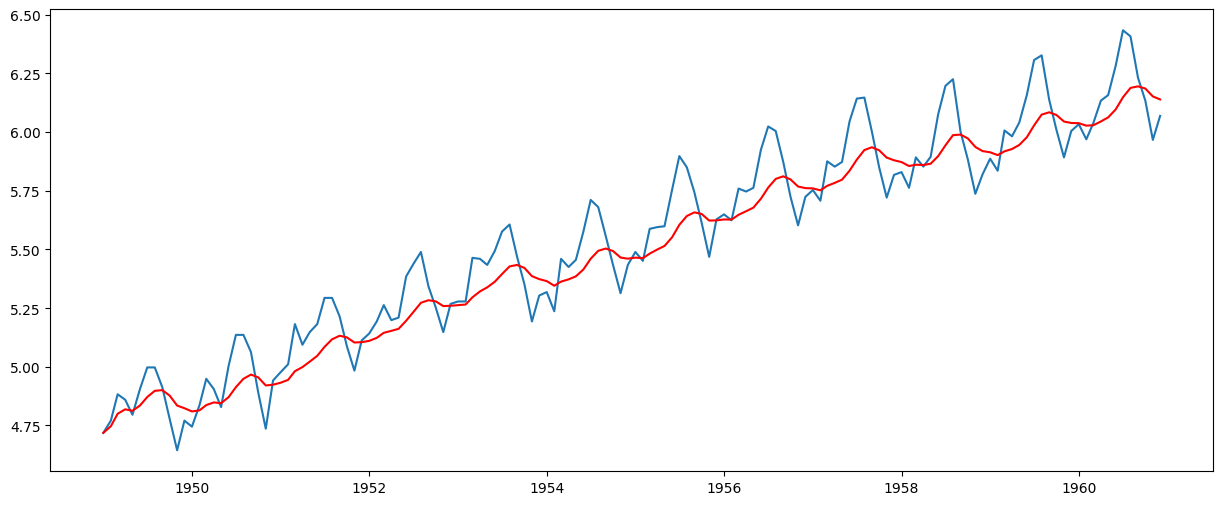

In [ ]:
expwighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

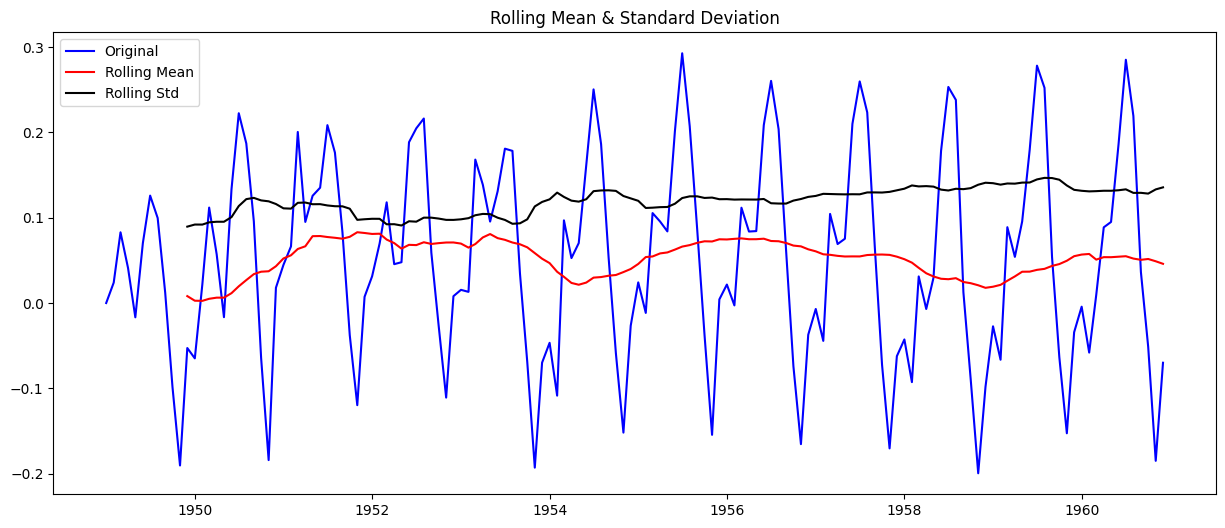

Results of Dickey-Fuller Test:
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

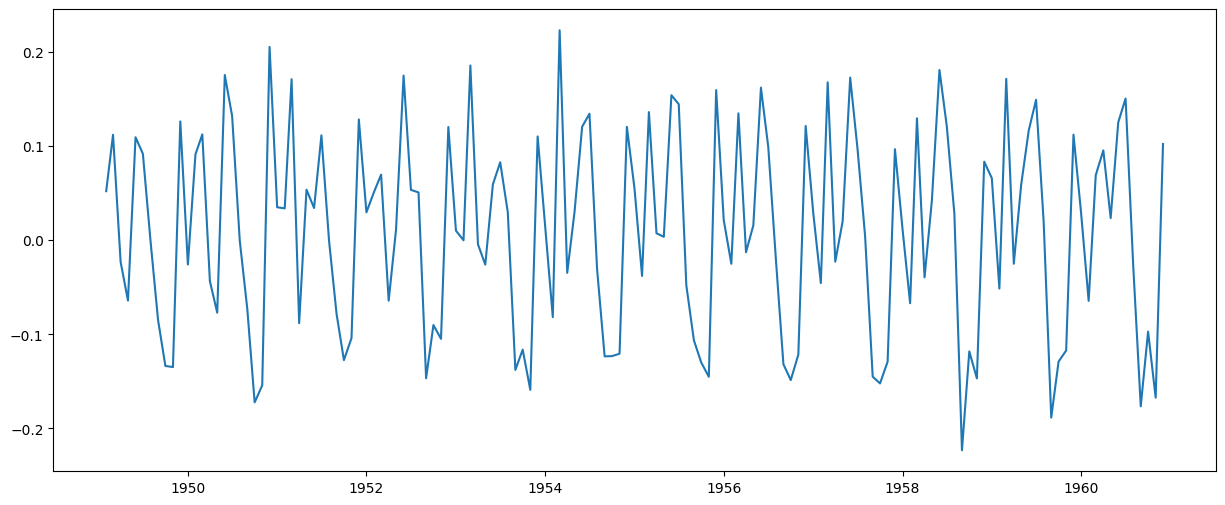

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

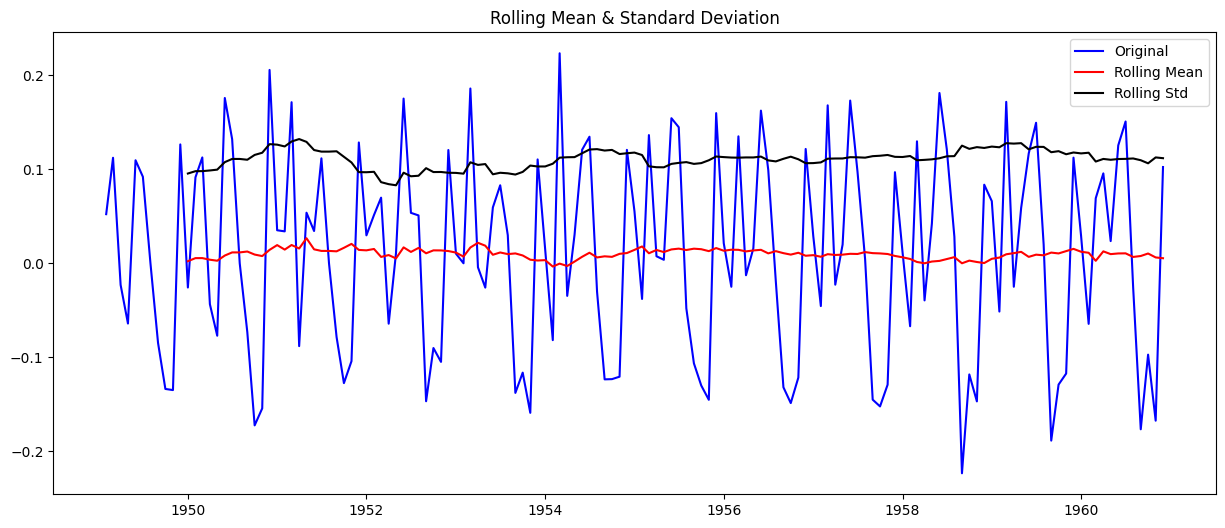

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

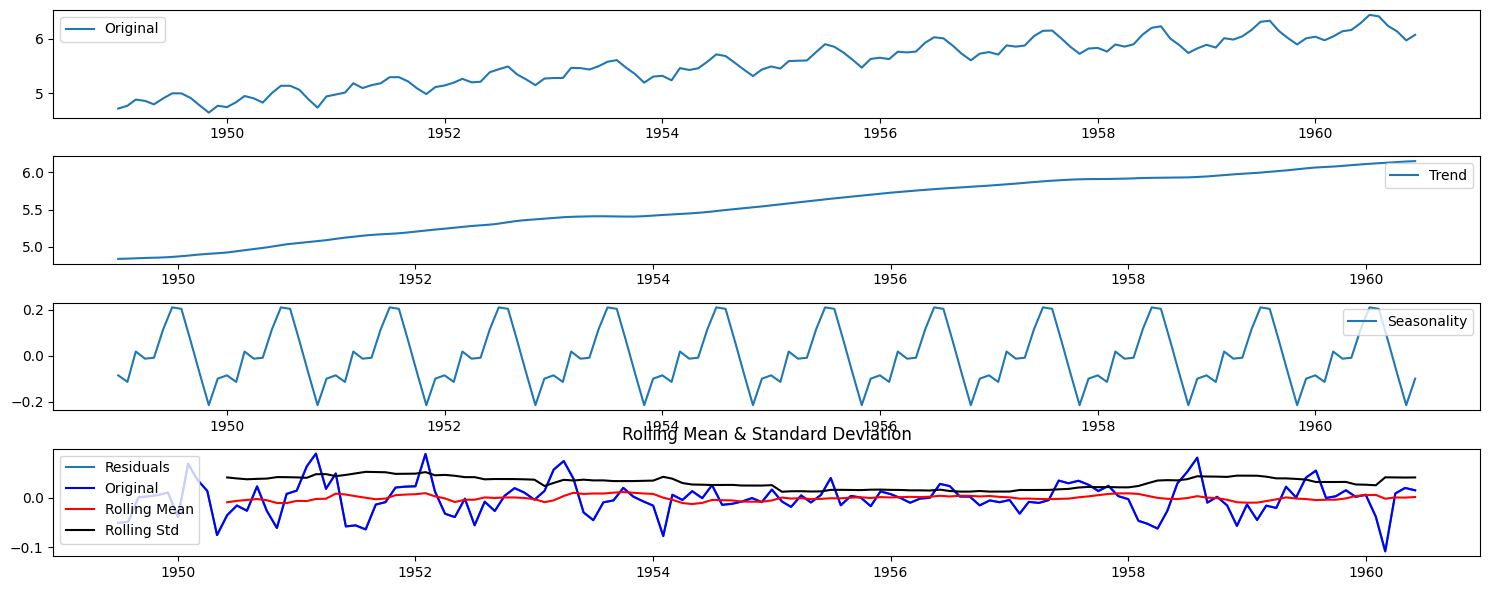

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
#FINAL FORECASTING
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

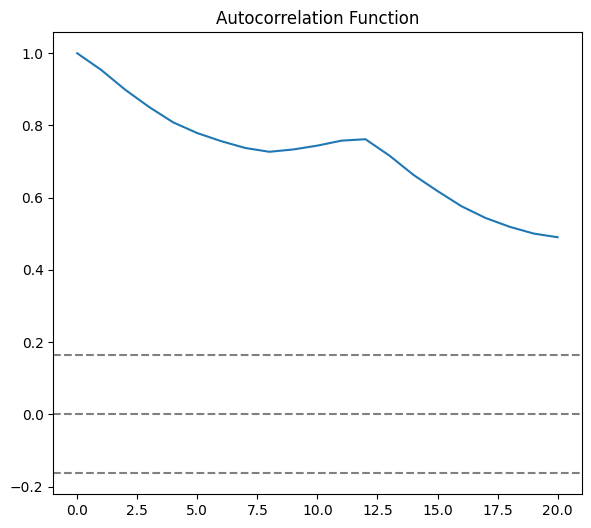

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

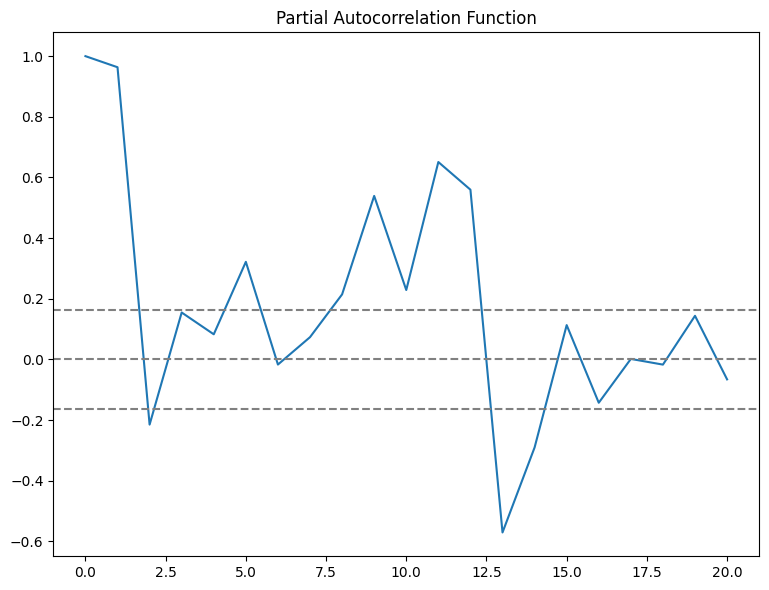

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### **Model Building**

In [ ]:
ts_values=ts_log.values

X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [ ]:
len(train)

96

In [ ]:
len(test)

48

In [ ]:
#AR Model
#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#p --> 4
#d --> 1
#q --> 2

#How did i get these values?

In [ ]:
history = [x for x in train]
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=5.774141, expected=5.752573
predicted=5.722150, expected=5.707110
predicted=5.731505, expected=5.874931
predicted=5.903622, expected=5.852202
predicted=5.815891, expected=5.872118
predicted=5.924785, expected=6.045005
predicted=6.023174, expected=6.142037
predicted=6.118355, expected=6.146329
predicted=6.173341, expected=6.001415
predicted=5.887091, expected=5.849325
predicted=5.800561, expected=5.720312
predicted=5.794394, expected=5.817111
predicted=5.859294, expected=5.828946
predicted=5.792696, expected=5.762051
predicted=5.793265, expected=5.891644
predicted=5.919774, expected=5.852202
predicted=5.807143, expected=5.894403
predicted=5.932723, expected=6.075346
predicted=6.066207, expected=6.196444
predicted=6.191349, expected=6.224558
predicted=6.258998, expected=6.001415
predicted=5.890675, expected=5.883322
predicted=5.858096, expected=5.736572
predicted=5.699381, expected=5.820083
predicted=5.928300, expected=5.886104
predicted=5.904793, expected=5.834811
predicted=5.

In [ ]:
ts.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
ts_log.head(5)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


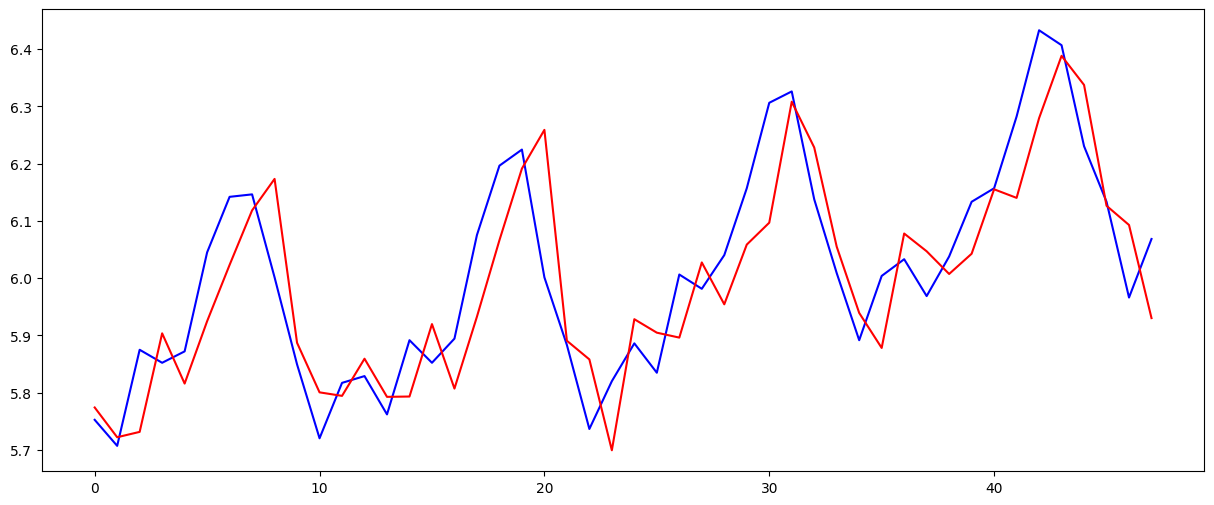

In [ ]:
# plot
pyplot.plot(test, color = 'blue', label='test')
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

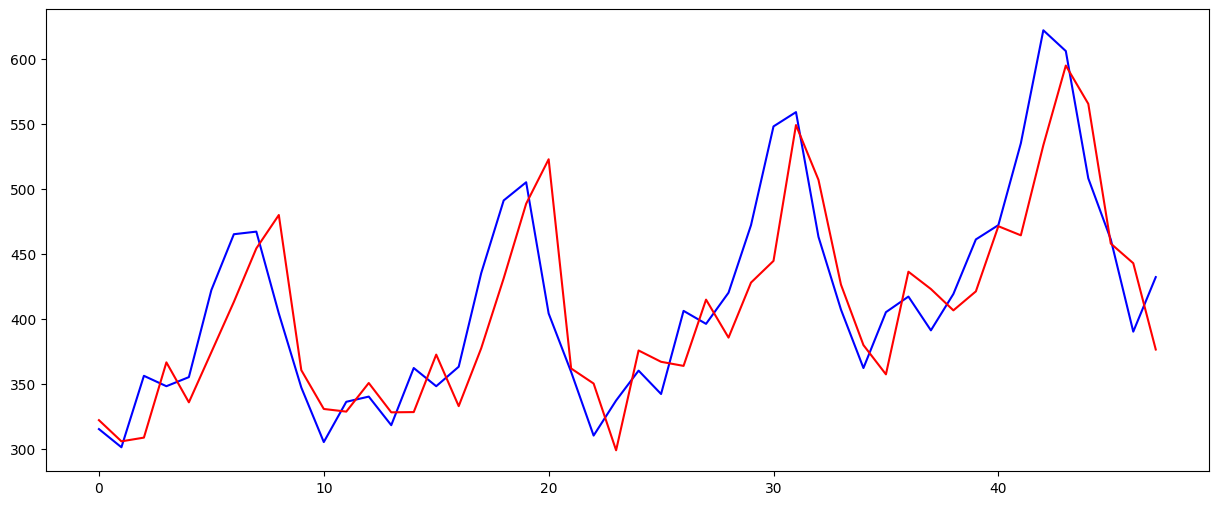

In [ ]:
# plot
pyplot.plot(np.exp(test), color = 'blue', label='test')
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.show()

In [ ]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 43.12


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1,
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1,
                         seasonal=True, stationary=False, information_criterion='aic',
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True,
                         n_jobs=1, start_params=None, trend=None, method='lbfgs',
                         maxiter=50, offset_test_args=None, seasonal_test_args=None,
                         suppress_warnings=True, error_action='trace', trace=False,
                         random=False, random_state=None, n_fits=10,
                         return_valid_fits=False, out_of_sample_size=0,
                         scoring='mse', scoring_args=None, with_intercept='auto',
                         sarimax_kwargs=None)

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(4, 1, 2)   Log Likelihood                  97.995
Date:                Thu, 08 Jun 2023   AIC                           -179.991
Time:                        05:21:39   BIC                           -159.560
Sample:                             0   HQIC                          -171.735
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0112      0.003      4.435      0.000       0.006       0.016
ar.L1          0.0658      0.155      0.424      0.671      -0.238       0.370
ar.L2          0.3865      0.157      2.458      0.014       0.078       0.695
ar.L3         -0.2734      0.125     -2.182      0.029      -0.519      -0.028
ar.L4         -0.1824      0.122     -1.496      0.135      -0.421       0.057
ma.L1         -0.0734      0.121     -0.604      0.546      -0.311       0.165
ma.L2         -0.8502      0.128     -6.655      0.000      -1.101      -0.600
sigma2         0.0072      0.002      4.225      0.000       0.004       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 4.09
Prob(Q):                              0.54   Prob(JB):                         0.13
Heteroskedasticity (H):               0.83   Skew:                             0.15
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['predicted_sales']

np.exp(prediction_arima_model)

,predicted_sales
0,343.245041
1,364.098421
2,382.167624
3,375.963261
4,372.883915
5,365.625033
6,366.495468
7,369.810091
8,377.128998
9,384.330894


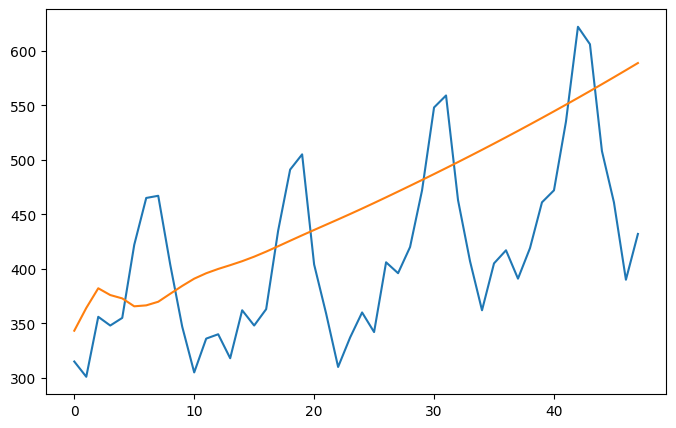

In [ ]:
plt.figure(figsize=(8,5))
#plt.plot(train, label='Training')
plt.plot(np.exp(test), label='Test')
plt.plot(np.exp(prediction_arima_model), label='Predictions')
plt.show()

In [ ]:
##########################################################################
##########################################################################
######################DETERMINE PDQ VALUES - DO NOT RUN###################
##########################################################################
##########################################################################
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	#train_size = int(len(X) * 0.8)
	#train, test = X[0:train_size], X[train_size:]
	#history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
import datetime
print(datetime.datetime.now())
p_values = [1,2,3,4,5,6]
d_values = [0,1,2]
q_values = [1,2,3,4,5]
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2023-06-08 04:15:17.248099
Best ARIMANone MSE=inf
2023-06-08 04:15:17.467221


In [ ]:
train

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

In [ ]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')



import datetime
print(datetime.datetime.now())
p_values = [1,2,3,4,5]
d_values = [0,1]
q_values = [1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2023-06-08 04:16:02.104963
Best ARIMANone MSE=inf
2023-06-08 04:16:02.112499


### **Grid Search**

In [ ]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
print("now =", now)
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

now = 2023-06-08 05:08:33.510185
date and time = 08/06/2023 05:08:33


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define ranges for p, q, and d
p_values = [1,2,3,4,5,6]
d_values = [0,1,2]
q_values = [1,2,3,4,5,6]

best_rmse, best_p, best_d, best_q = np.inf, None, None, None
history = [x for x in train]
# make predictions
predictions = list()
# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
              for t in range(len(test)):
                # Fit the model
                model = ARIMA(history, order=order)
                model_fit = model.fit()
                yhat = model_fit.forecast()[0]
                predictions.append(yhat)
                history.append(test[t])

              # Calculate RMSE
              rmse = np.sqrt(mean_squared_error(test, predictions))

              # Update best RMSE and parameter values
              if rmse < best_rmse:
                    best_rmse, best_p, best_d, best_q = rmse, p, d, q

            except:
                continue

print(f"Best RMSE: {best_rmse}")
print(f"Best p: {best_p}")
print(f"Best d: {best_d}")
print(f"Best q: {best_q}")

from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
print("now =", now)
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

Best RMSE: 0.10933041855283904
Best p: 1
Best d: 0
Best q: 1
now = 2023-06-08 05:11:59.515188
date and time = 08/06/2023 05:11:59
